In [69]:
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
# 3 Storage channels:
# Grid
# Ships Container
# Hit Grid

In [120]:
class Ships:

    def __init__(self,grid):
        grid = np.array(grid)
        y,x = grid.shape
        self.grid = np.zeros([y,x])
        self.ships = []
        self.omap = np.where(grid ==0 ,1,0)
        
    def rand_ship(self,l):
        n = 0
        my, mx = self.omap.shape 
        mx -= 1
        my -= 1
        
        x = randint(0,mx)
        y = randint(0,my)
        o = randint(0,1)
        while not self.add_ship(x,y,l,o):
            n += 1
            x = randint(0,mx)
            y = randint(0,my)
            o = randint(0,1)
            if n > 100:
                print("error")
                break
    def add_ship(self,x,y,l,isVertical = True,verbose = False):
        nship = {}
        nship["idx"] = len(self.ships) + 1
        #map + grid = the combined map to check for collisions
        combi = self.omap + self.grid
        isCollide = False
        yn = y
        xn = x
        print(x,",",y)
        try:
            for i in range(l):
                if combi[yn][xn] != 0:
                    isCollide = True
                    break
                if isVertical:
                    yn += 1
                else:
                    xn += 1
        except:
            return False
        #if everything is fine then add to data
        if not isCollide:
            nship["l"] = l
            nship["sunk"] = False
            #populate ship grid
            for i in range(l):
                self.grid[y][x] = nship["idx"]
                if isVertical:
                    y += 1
                else:
                    x += 1
            x
            self.ships.append(nship)
            return True
        else:
            if verbose:
                print("Could Not add ship due to collision")
            return False

    def get_mask(self):
        #Generator function to return a dynamic mask
        return [i["l"] for i in self.ships if not i["sunk"]]

    def checkHit(self,x,y,testonly=False):
        if self.grid[y][x] != 0:
            #Its a hit.
            if not testonly:
                self.grid[y][x] = 0
                self.updateShipfromgrid()
            return True
        else:
            return False
            
    def updateShipfromgrid(self):
        for i in self.ships:
            if i.sunk:
                continue
            if np.sum(np.where(self.grid == i.l,1,0)) == 0:
                i.sunk = True

    def get_map(self):
        return self.grid

In [121]:
def positional_grid(gmap,gmask):
    mask = np.ones([gmask,1])
    grid = np.array(gmap)
    mask = np.array(mask)
    res = np.where(convolve2d(grid,mask,"full") == np.sum(mask),1,0)
    res = res[(mask.shape[0] - 1):,(mask.shape[1] - 1):]
    mask2 = np.transpose(mask)
    res2 = np.where(convolve2d(grid,mask2,"full") == np.sum(mask2),1,0)
    res2 = res2[(mask2.shape[0] - 1):,(mask2.shape[1] - 1):]
    return res + res2

def proc_Hitgrid(gmap,gHit,gmask,hitweight = 5):
    gmap = np.array(gmap)
    gHit = np.array(gHit)
    mask = np.array(np.ones([gmask,1]))

    #overlay the hit mask with the grid mask
    grid = gmap + (gHit * hitweight)

    #vertical and horizontal
    res = np.where(convolve2d(grid,mask,"full") == np.sum(mask),1,0)
    res = res[(mask.shape[0] - 1):,(mask.shape[1] - 1):]
    mask2 = np.transpose(mask)
    res2 = np.where(convolve2d(grid,mask2,"full") == np.sum(mask2),1,0)
    res2 = res2[(mask2.shape[0] - 1):,(mask2.shape[1] - 1):]

    final = res + res2

    #remove the original Hitmask
    remHit = np.where(np.array(gHit) == 1,0,1)
    
    
    return np.multiply(remHit, final)


def Checkhit(x,y,gmap,ghit):
    # if the ship exists
    if Lships.checkHit(x,y):
        ghit[y][x] = 1
        
    



def visGrid(grid):
    plt.figure()
    plt.imshow(grid,cmap='gray')
    plt.grid(True,color='blue')
    plt.draw()
    

1 , 0
2 , 0
2 , 0
4 , 2
1 , 1
2 , 3
4 , 2
1 , 4
4 , 3
1 , 1
3 , 2
[[ 0.  0.  0.  0.  0.]
 [ 0.  2.  2.  0.  0.]
 [ 0.  0.  0.  4.  1.]
 [ 0.  0.  3.  3.  1.]
 [ 0.  0.  0.  0.  1.]]
4


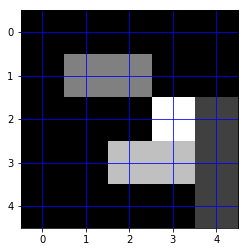

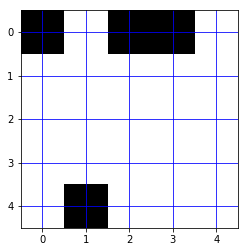

In [122]:
#def hitgrid(activehit,)
grid = [[0, 1, 0, 0, 1],
        [1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1], 
        [1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1]]

Lships = Ships(grid)
Lships.rand_ship(3)
Lships.rand_ship(2)
Lships.rand_ship(2)
Lships.rand_ship(1)
print(Lships.get_map())
visGrid(Lships.get_map())
print(len(Lships.ships))
visGrid(grid)


In [123]:
print(Lships.get_mask())

[3, 2, 2, 1]


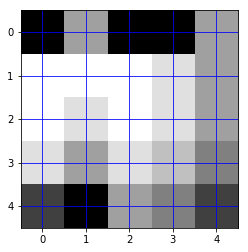

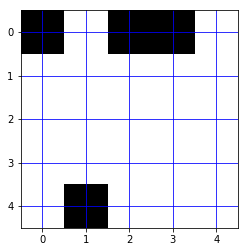

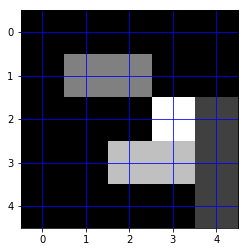

In [125]:
res = sum([positional_grid(grid,i) for i in Lships.get_mask()])
visGrid(res)

visGrid(grid)
visGrid(Lships.get_map())

In [132]:
print(res)

[[0 5 0 0 5]
 [8 8 8 7 5]
 [8 7 8 7 5]
 [7 5 7 6 4]
 [2 0 5 4 2]]


In [143]:
i,j = np.unravel_index(res.argmax(), res.shape)
print(i,j)

1 0
